In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
match_events = pd.read_csv('match_events.csv')

In [3]:
match_events

,Time,Competitor,Operation,OrderId,Instrument,Side,Volume,Price,Lifespan,Fee
0,0.000000,NaN,Insert,177349435,0.0,B,1000,146900.0,G,NaN
1,0.000000,NaN,Insert,177349439,0.0,A,8000,147000.0,G,NaN
2,0.000000,NaN,Insert,177349467,0.0,A,3000,147200.0,G,NaN
3,0.000000,NaN,Insert,177349475,0.0,A,2000,147100.0,G,NaN
4,0.000000,NaN,Insert,177349487,0.0,A,2000,181600.0,G,NaN
...,...,...,...,...,...,...,...,...,...,...
469086,899.901512,NaN,Insert,7034062,1.0,A,10000,152200.0,G,NaN
469087,899.901512,NaN,Insert,7034063,1.0,B,10000,151000.0,G,NaN
469088,899.902420,NaN,Insert,205198743,0.0,B,1000,150100.0,G,NaN
469089,899.955806,NaN,Insert,205199427,0.0,A,1000,153300.0,G,NaN


In [4]:
#takes the match_events table and creates a new table with rows where Operation is 'Buy' and columns for the 'Price' and 'Quantity'
buy_events = match_events[match_events['Operation'] == 'Insert'][['Price', 'Time', 'Instrument']]
buy_events

,Price,Time,Instrument
0,146900.0,0.000000,0.0
1,147000.0,0.000000,0.0
2,147200.0,0.000000,0.0
3,147100.0,0.000000,0.0
4,181600.0,0.000000,0.0
...,...,...,...
469083,149000.0,899.836436,0.0
469086,152200.0,899.901512,1.0
469087,151000.0,899.901512,1.0
469088,150100.0,899.902420,0.0


In [5]:
#for every 1000 rows in the buy_events table, take the mean of the Price column and create a new table with the mean price and the time of the first row in the 1000 rows
buy_events_1000 = buy_events.groupby(buy_events.index // 1000).mean()
buy_events_1000

,Price,Time,Instrument
0,145573.244782,0.971915,0.036053
1,146491.245136,3.665422,0.050584
2,146397.821782,5.674956,0.019802
3,145290.715667,6.674741,0.038685
4,146049.000000,8.845682,0.066000
...,...,...,...
465,152172.656250,889.754392,0.062500
466,152344.466019,892.976121,0.081553
467,151504.901961,895.278910,0.050980
468,151946.259843,898.106359,0.092520


In [6]:
#removes any rows from the table where the price is greater than 1.5 times the IQR of the price column
buy_events_1000 = buy_events_1000[buy_events_1000['Price'] < buy_events_1000['Price'].quantile(0.75) + 1.5 * (buy_events_1000['Price'].quantile(0.75) - buy_events_1000['Price'].quantile(0.25))]


<Axes: xlabel='Time'>

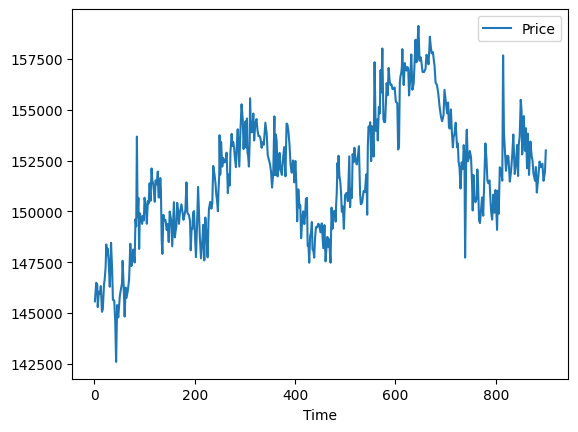

In [7]:
#plot the price column against the time column
buy_events_1000.plot(x='Time', y='Price')

In [8]:
#create two dataframes from match events, one for Instrument = 1.0 and one for Instrument = 0.0
match_events_1 = match_events[match_events['Instrument'] == 1.0]
match_events_0 = match_events[match_events['Instrument'] == 0.0]


In [9]:
#for every 1000 rows in each of the match_events_1 and match_events_0 dataframes, take the mean of the Price column and create a new table with the mean price and the time of the first row in the 1000 rows
match_events_1_1000 = match_events_1.groupby(match_events_1.index // 1000).mean()
match_events_0_1000 = match_events_0.groupby(match_events_0.index // 1000).mean()


C:\Users\freel\AppData\Local\Temp\ipykernel_24252\3150438701.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_events_1_1000 = match_events_1.groupby(match_events_1.index // 1000).mean()
C:\Users\freel\AppData\Local\Temp\ipykernel_24252\3150438701.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  match_events_0_1000 = match_events_0.groupby(match_events_0.index // 1000).mean()


In [10]:
#removes any rows from the two dataframes where the price is greater than 1.5 times the IQR of the price column
match_events_1_1000 = match_events_1_1000[match_events_1_1000['Price'] < match_events_1_1000['Price'].quantile(0.75) + 1.5 * (match_events_1_1000['Price'].quantile(0.75) - match_events_1_1000['Price'].quantile(0.25))]
match_events_0_1000 = match_events_0_1000[match_events_0_1000['Price'] < match_events_0_1000['Price'].quantile(0.75) + 1.5 * (match_events_0_1000['Price'].quantile(0.75) - match_events_0_1000['Price'].quantile(0.25))]


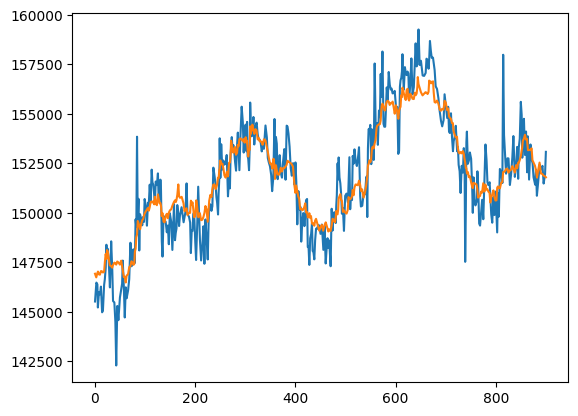

In [11]:
plt.plot(match_events_0_1000['Time'], match_events_0_1000['Price'], label='Instrument 0')
plt.plot(match_events_1_1000['Time'], match_events_1_1000['Price'], label='Instrument 1')
plt.show()

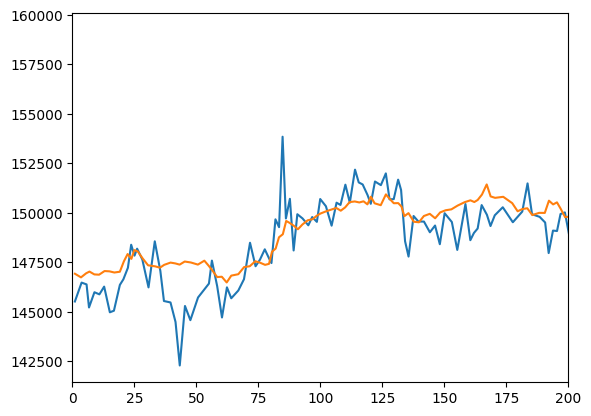

In [21]:
#show just the plot between 0 and 200
plt.plot(match_events_0_1000['Time'], match_events_0_1000['Price'], label='Instrument 0')
plt.plot(match_events_1_1000['Time'], match_events_1_1000['Price'], label='Instrument 1')
plt.xlim(0, 200)
plt.show()

,Time,Competitor,Operation,OrderId,Instrument,Side,Volume,Price,Lifespan,Fee
0,0.000000,NaN,Insert,177349435,0.0,B,1000,146900.0,G,NaN
100,0.000000,NaN,Insert,177353423,0.0,B,2000,113000.0,G,NaN
200,0.305791,NaN,Cancel,177352535,NaN,NaN,-1000,NaN,NaN,NaN
300,0.590403,NaN,Cancel,177360243,NaN,NaN,-1000,NaN,NaN,NaN
400,0.835102,NaN,Insert,177368283,0.0,B,2000,112900.0,G,NaN
...,...,...,...,...,...,...,...,...,...,...
468600,898.379534,NaN,Cancel,7034050,NaN,NaN,-10000,NaN,NaN,NaN
468700,899.007266,NaN,Insert,205172927,0.0,A,1000,151800.0,G,NaN
468800,899.206301,NaN,Cancel,205177583,NaN,NaN,-8000,NaN,NaN,NaN
468900,899.523313,NaN,Insert,205182659,0.0,A,1000,151700.0,G,NaN


In [14]:
score_board = pd.read_csv('score_board.csv')

In [15]:
score_board

,Time,Team,Operation,BuyVolume,SellVolume,EtfPosition,FuturePosition,EtfPrice,FuturePrice,TotalFees,AccountBalance,ProfitOrLoss,Status
0,0.000,Dummy,Tick,0,0,0,0,NaN,NaN,0,0,0,OK
1,0.312,Dummy,Tick,0,0,0,0,NaN,NaN,0,0,0,OK
2,0.546,Dummy,Tick,0,0,0,0,NaN,NaN,0,0,0,OK
3,0.703,Dummy,Tick,0,0,0,0,NaN,NaN,0,0,0,OK
4,1.015,Dummy,Tick,0,0,0,0,147600.0,NaN,0,0,0,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3596,898.984,Dummy,Tick,884,879,5,-5,152400.0,151700.0,53673,-531473,-529973,OK
3597,899.281,Dummy,Tick,884,879,5,-5,152400.0,151800.0,53673,-531473,-529973,OK
3598,899.515,Dummy,Tick,884,879,5,-5,152400.0,151800.0,53673,-531473,-529973,OK
3599,899.765,Dummy,Tick,884,879,5,-5,152400.0,151600.0,53673,-531473,-529973,OK


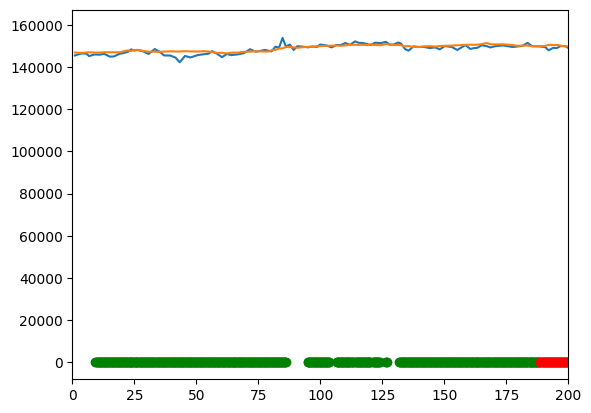

In [25]:
#marks the previous plot with green dots where the EtfPosition increases and red dots where the EtfPosition decreases
plt.plot(match_events_0_1000['Time'], match_events_0_1000['Price'], label='Instrument 0')
plt.plot(match_events_1_1000['Time'], match_events_1_1000['Price'], label='Instrument 1')
plt.xlim(0, 200)
plt.scatter(score_board[score_board['EtfPosition'] > 0]['Time'], score_board[score_board['EtfPosition'] > 0]['EtfPosition'], c='g')
plt.scatter(score_board[score_board['EtfPosition'] < 0]['Time'], score_board[score_board['EtfPosition'] < 0]['EtfPosition'], c='r')
plt.show()

ValueError: x and y must be the same size

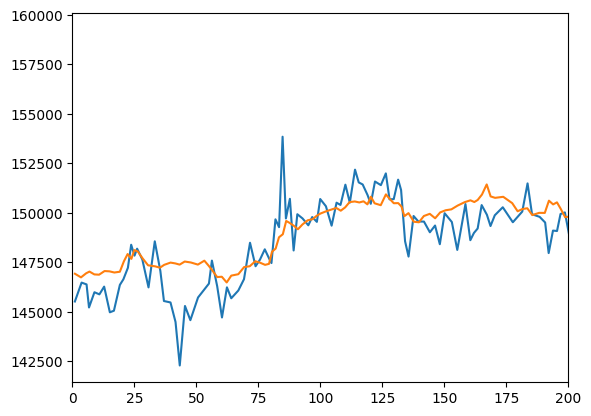

In [28]:
#plots the dots on the match_events_1_1000 line with smaller dots
plt.plot(match_events_0_1000['Time'], match_events_0_1000['Price'], label='Instrument 0')
plt.plot(match_events_1_1000['Time'], match_events_1_1000['Price'], label='Instrument 1')
plt.xlim(0, 200)
plt.scatter(score_board[score_board['EtfPosition'] > 0]['Time'], score_board[score_board['EtfPosition'] > 0]['EtfPosition'], c='g', s=1)
plt.scatter(score_board[score_board['EtfPosition'] < 0]['Time'], score_board[score_board['EtfPosition'] < 0]['EtfPosition'], c='r', s=1)
plt.show()

In [16]:
#show the first 50 rows of the score_board table
score_board.head(50)

,Time,Team,Operation,BuyVolume,SellVolume,EtfPosition,FuturePosition,EtfPrice,FuturePrice,TotalFees,AccountBalance,ProfitOrLoss,Status
0,0.000,Dummy,Tick,0,0,0,0,NaN,NaN,0,0,0,OK
1,0.312,Dummy,Tick,0,0,0,0,NaN,NaN,0,0,0,OK
2,0.546,Dummy,Tick,0,0,0,0,NaN,NaN,0,0,0,OK
3,0.703,Dummy,Tick,0,0,0,0,NaN,NaN,0,0,0,OK
4,1.015,Dummy,Tick,0,0,0,0,147600.0,NaN,0,0,0,OK
5,1.250,Dummy,Tick,0,0,0,0,147600.0,147100.0,0,0,0,OK
6,1.453,Dummy,Tick,0,0,0,0,147600.0,147100.0,0,0,0,OK
7,1.765,Dummy,Tick,0,0,0,0,147600.0,147100.0,0,0,0,OK
8,2.046,Dummy,Tick,0,0,0,0,147600.0,147100.0,0,0,0,OK
9,2.281,Dummy,Tick,0,0,0,0,147600.0,146900.0,0,0,0,OK


In [17]:
#create a table that only contains rows where the "EtfPosition" column changed from the previous row
good_trades = score_board[score_board['EtfPosition'].diff() != 0]

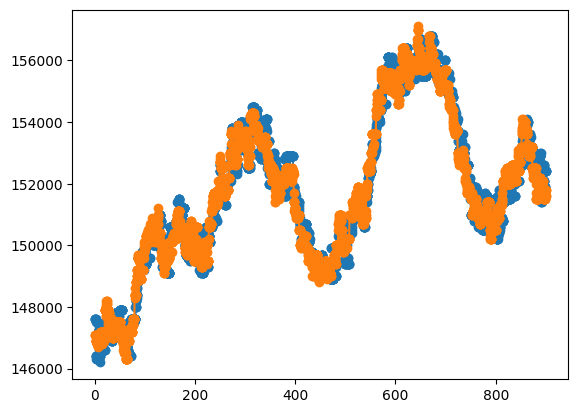

In [18]:
#Plots the EtfPrice and FuturePrice against the Time column with discrete markers
plt.plot(score_board['Time'], score_board['EtfPrice'], label='EtfPrice', marker='o')
plt.plot(score_board['Time'], score_board['FuturePrice'], label='FuturePrice', marker='o')

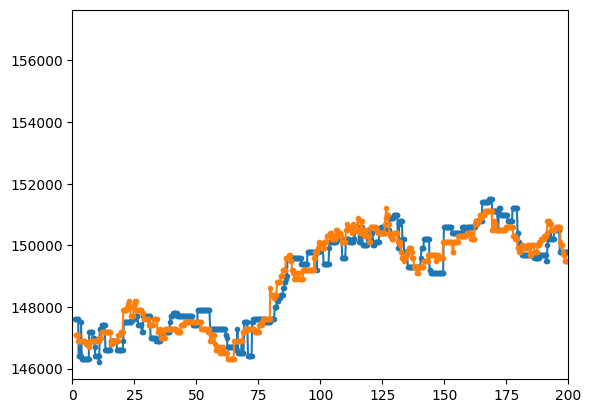

In [19]:
#show just the plot between 0 and 200
plt.plot(score_board['Time'], score_board['EtfPrice'], label='EtfPrice', marker='.')
plt.plot(score_board['Time'], score_board['FuturePrice'], label='FuturePrice', marker='.')
plt.xlim(0, 200)
plt.show()

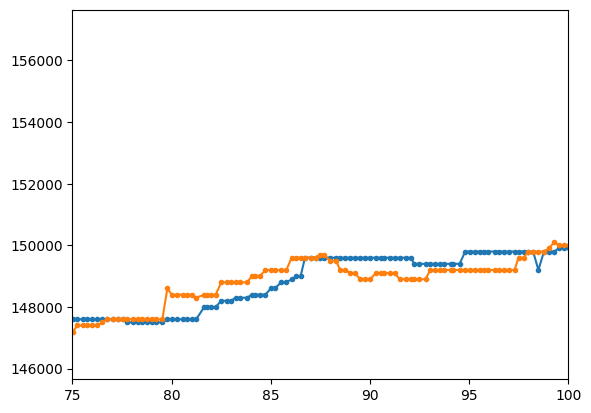

In [20]:
#show the graph between 75 and 100
plt.plot(score_board['Time'], score_board['EtfPrice'], label='EtfPrice', marker='.')
plt.plot(score_board['Time'], score_board['FuturePrice'], label='FuturePrice', marker='.')
plt.xlim(75, 100)
plt.show()